<a href="https://colab.research.google.com/github/jaimeh94/ml-zoomcamp/blob/main/02-regression/Homework_Session2_MLZoomCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Dataset
In this homework, we will use the New York City Airbnb Open Data. 

The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

# EDA (Exploration Data Analisis)
* Load the data.
* Look at the price variable. Does it have a long tail?

In [32]:
if not os.path.isfile('./AB_NYC_2019.csv'):
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

In [33]:
df_prev = pd.read_csv('AB_NYC_2019.csv')
df_prev.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [34]:
df_prev.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [35]:
for col in df_prev.columns:
    print(col)
    print(df_prev[col].unique()[:5])
    print(df_prev[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
47905

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
11452

neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5

neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['Private room' 'Entire home/apt' 'Shared room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

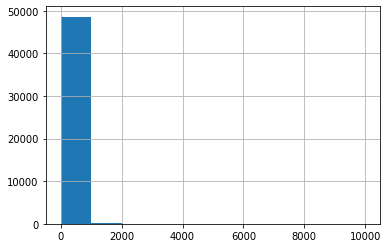

In [36]:
df_prev.price.hist()

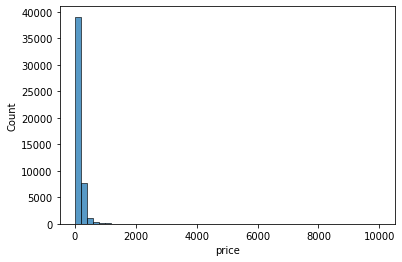

In [37]:
sns.histplot(df_prev.price, bins=50)

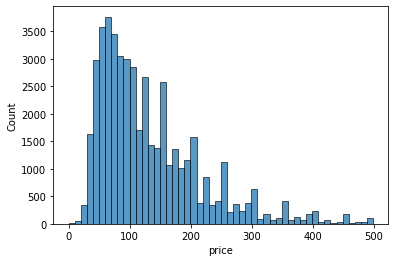

In [38]:
sns.histplot(df_prev.price[df_prev.price < 500], bins=50)

In [39]:
df_prev.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Features
For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'price',
* 'minimum_nights',
* 'number_of_reviews',
* 'reviews_per_month',
* 'calculated_host_listings_count',
* 'availability_365'

Select only them.

In [40]:
features = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'
]

In [41]:
df = df_prev[features]
df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Question 1
Find a feature with missing values. How many missing values does it have?

In [42]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [43]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [44]:
print("The median of feature 'minimum_nights' is ",df['minimum_nights'].describe()['50%'])

The median of feature 'minimum_nights' is  3.0


# Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.

In [45]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)


np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)


del df_train['price']
del df_val['price']
del df_test['price']

In [77]:
def split_data(df, seed):
  import numpy as np
  """
  This function split the data from a seed
  """
  n = len(df)

  n_val = int(n * 0.2)
  n_test = int(n * 0.2)
  n_train = n - n_val - n_test

  idx = np.arange(n)


  np.random.seed(seed)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)


  del df_train['price']
  del df_val['price']
  del df_test['price']

  return df_train, df_val, df_test, y_train, y_val, y_test

# Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [46]:
df_train.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [47]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [54]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [64]:
def prepare_X(df, fill_with):
    # df_num = df[base]
    df_num = df
    df_num = df_num.fillna(fill_with)
    X = df_num.values
    return X

In [66]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

In [67]:
round(score, 2)

0.64

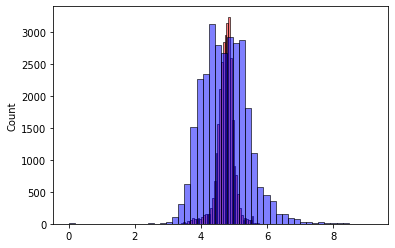

In [49]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [68]:
rvpm_mean = df_train.reviews_per_month.mean()
print(rvpm_mean)

X_train = prepare_X(df_train, rvpm_mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, rvpm_mean)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

1.3685492094777056


In [69]:
round(score, 2)

0.64

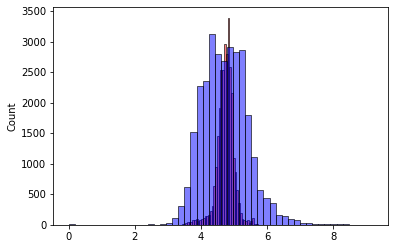

In [52]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [71]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [72]:
Rs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [75]:
for r in Rs:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print('r: {} \n w0: {} \n score: {} \n'.format(r, w0, round(score,2)))

r: 0 
 w0: -419.91265807142094 
 score: 0.64 

r: 1e-06 
 w0: -419.8627153336333 
 score: 0.64 

r: 0.0001 
 w0: -414.97649233703777 
 score: 0.64 

r: 0.001 
 w0: -375.27365241862066 
 score: 0.64 

r: 0.01 
 w0: -191.78384049339815 
 score: 0.66 

r: 0.1 
 w0: -32.56256054966786 
 score: 0.68 

r: 1 
 w0: -3.4992168354209157 
 score: 0.68 

r: 5 
 w0: -0.7033623171188026 
 score: 0.68 

r: 10 
 w0: -0.35127675921831375 
 score: 0.68 



# Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [78]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [80]:
RMSE_scores = []
for seed in seeds:
  df_train, df_val, df_test, y_train, y_val, y_test = split_data(df,seed)
  X_train = prepare_X(df_train, 0)
  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X(df_val, 0)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  RMSE_scores.append(score)

In [84]:
print('STD of RMSE scores for different seeds is ', round(np.std(RMSE_scores),3))

STD of RMSE scores for different seeds is  0.008


# Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [87]:
df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, 9)


df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, 0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print('The RMSE on the test dataset is ', round(score,2))

The RMSE on the test dataset is  0.65
